### Лабортаторная работа №3 по курсо ТМО
### Холодова Карина
### ИУ5Ц-82Б


# Датасет Melbourne Housing Snapshot
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?resource=download

Набор данных содержит информацию о рынке недвижимости Мельбурна. Он включает такие характеристики объектов, как адрес, тип недвижимости, пригород, способ продажи, количество комнат, цена, агент по недвижимости, дата продажи и расстояние до центра города. Данные предоставлены на основе публичных источников с сайта Domain.com.au и предназначены для анализа рынка и прогнозирования ценовых трендов.

In [8]:
# Импорт базовых библиотек для анализа данных и визуализации

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [9]:
# Импорт библиотек для предобработки данных

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [10]:
# Загрузка датасета о недвижимости в Мельбурне

data = pd.read_csv('melb_data.csv', sep=",")

In [11]:
# Проверка размера датасета

data.shape

(13580, 21)

In [12]:
# Просмотр типов данных в датасете

data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [13]:
# Проверка количества пропущенных значений по каждому столбцу

data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [14]:
# Просмотр первых 5 строк датасета

data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Обработка пропусков категориальных признаков

In [15]:
# Поиск категориальных колонок с пропущенными значениями

total_count = data.shape[0]

cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка CouncilArea. Тип данных object. Количество пустых значений 1369, 10.08%.


In [16]:
# Получение описательной статистики для признака CouncilArea

data['CouncilArea'].describe()

count        12211
unique          33
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

Вывод: Всего 33 уникальных значения, самое частое — "Moreland", 1163 повторений.

In [17]:
# Просмотр уникальных значений в признаке CouncilArea

data['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

Вывод: Отображены все уникальные значения включая nan и 'Unavailable' — 34 уникальных значения с пропусками.

In [18]:
# Исследование связи между регионом и ценой
# Кодирование CouncilArea по средней цене для последующего анализа корреляции

# Провериим корреляцию региона и цены
# Для этого закодируем колонку 'CouncilArea' в зависимости от ее средней цены

df_ca_and_target = data[['Price', 'CouncilArea']].copy()
df_ca_and_target.dropna(subset=['CouncilArea'], inplace=True)

encoder_map = {}
for index, row in df_ca_and_target.groupby(by='CouncilArea').mean().sort_values(by=['Price']).reset_index().iterrows():
    encoder_map[row['CouncilArea']] = index
    # print(index, row)

# Преобразование значений CouncilArea с помощью созданной маппинг-схемы

le = LabelEncoder()
df_ca_and_target['CouncilArea'] = df_ca_and_target['CouncilArea'].map(encoder_map)

# Расчет корреляции между закодированным CouncilArea и ценой

df_ca_and_target.corr()

,Price,CouncilArea
Price,1.000000,0.423142
CouncilArea,0.423142,1.000000


Вывод: Корреляция между CouncilArea и Price составляет 0.423 — умеренная положительная связь.

In [19]:
# Удаление строк с пропущенными значениями в колонке CouncilArea, так как она слабо коррелирует с целевым признаком

data.dropna(subset=['CouncilArea'], inplace=True)

Вывод: Пропуски в CouncilArea удалены — теперь ноль пустых значений в этом столбце.

In [20]:
# Проверка, остались ли пропущенные значения в CouncilArea

data['CouncilArea'].isnull().sum()

np.int64(0)

Вывод: 0 пропущенных значений — удаление прошло успешно.

## Обработка пропусков числовых признаков

In [21]:
# Поиск числовых признаков с пропущенными значениями

num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка BuildingArea. Тип данных float64. Количество пустых значений 5765, 42.45%.
Колонка YearBuilt. Тип данных float64. Количество пустых значений 4763, 35.07%.


Вывод: Найдены числовые признаки BuildingArea (42.45%) и YearBuilt (35.07%) с большим числом пропусков

In [22]:
# Заполним пропуски в числовых признаков медианой, тк она меньше всего подвержена выбросам

# Функция для заполнения пропусков медианой — устойчива к выбросам

def fill_missing_median(dataset, column):
    temp_data = dataset[[column]]
    
    imp_num = SimpleImputer(strategy='median')
    data_num_imp = imp_num.fit_transform(temp_data)


    return data_num_imp


In [23]:
# Проверка количества пропусков в выбранных для заполнения числовых колонках

cols_for_imp = ['BuildingArea', 'YearBuilt']
data[cols_for_imp].isnull().sum()

BuildingArea    5765
YearBuilt       4763
dtype: int64

Вывод: В BuildingArea — 5765 пропусков, в YearBuilt — 4763

In [24]:
# Применение функции заполнения медианой к каждой колонке

for col in cols_for_imp:
    data[col] = fill_missing_median(data, col)
    print(f'After {col} imp:')
    print(data[cols_for_imp].isnull().sum())
    print()

After BuildingArea imp:
BuildingArea       0
YearBuilt       4763
dtype: int64

After YearBuilt imp:
BuildingArea    0
YearBuilt       0
dtype: int64



Вывод: Пропуски успешно заполнены — теперь в обеих колонках по 0 пропущенных значений

In [25]:
# Проверка пропусков по всему датасету после очистки

data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Вывод: Все пропуски в датафрейме устранены, таблица полностью готова к дальнейшей обработке

## Преобразвание категориальных признаков в числовые

In [26]:
# Определение всех признаков с типом object (категориальные признаки)

data.dtypes.loc[lambda x: x == 'object']

Suburb         object
Address        object
Type           object
Method         object
SellerG        object
Date           object
CouncilArea    object
Regionname     object
dtype: object

Вывод: Категориальных колонок — 8, включая Date, Type, Suburb и другие

#### Date

In [27]:
# Просмотр уникальных значений в колонке Date

data['Date'].unique()

array(['3/12/2016', '4/02/2016', '4/03/2017', '4/06/2016', '7/05/2016',
       '8/10/2016', '12/11/2016', '13/08/2016', '14/05/2016',
       '15/10/2016', '16/07/2016', '17/09/2016', '18/03/2017',
       '18/06/2016', '19/11/2016', '22/08/2016', '24/09/2016',
       '25/02/2017', '26/07/2016', '27/11/2016', '28/05/2016',
       '30/07/2016', '3/09/2016', '6/08/2016', '7/11/2016', '10/09/2016',
       '10/12/2016', '11/02/2017', '16/04/2016', '22/05/2016',
       '23/04/2016', '12/06/2016', '27/06/2016', '28/08/2016',
       '11/03/2017', '28/01/2016', '6/05/2017', '8/04/2017', '29/04/2017',
       '13/05/2017', '20/05/2017', '22/04/2017', '1/07/2017', '3/06/2017',
       '17/06/2017', '24/06/2017', '27/05/2017', '8/07/2017',
       '12/08/2017', '15/07/2017', '22/07/2017', '29/07/2017'],
      dtype=object)

Вывод: Присутствует большое количество различных дат продаж в формате 'день/месяц/год'

In [28]:
# Разделим поле Date на day, month, year
date = pd.to_datetime(data['Date'], format='mixed')

data['Day'] = date.dt.day
data['Month'] = date.dt.month
data['Year'] = date.dt.year
data.drop(columns='Date', inplace=True)

data[['Day', 'Month', 'Year']]

,Day,Month,Year
0,12,3,2016
1,2,4,2016
2,3,4,2017
3,3,4,2017
4,6,4,2016
...,...,...,...
12208,29,7,2017
12209,29,7,2017
12210,29,7,2017
12211,29,7,2017


#### Adress

In [29]:
# Преобразуем улицу в адрес

data['Street'] = data['Address'].map(lambda addr: addr.split()[1])
data.drop(columns='Address', inplace=True)

data['Street']

0            Turner
1         Bloomburg
2           Charles
3        Federation
4              Park
            ...    
12208         Pasco
12209          Peel
12210      Saltlake
12211        Adeney
12212      Pentland
Name: Street, Length: 12211, dtype: object

In [30]:
# Подсчет количества уникальных значений в колонке Street

data['Street'].unique().shape

(3721,)

В столбце Street — 3721 уникальное значение, что делает его малополезным для обучения модели (слишком высокая кардинальность).

#### Other

In [31]:
# Выбор всех категориальных признаков (объектного типа данных)

data.dtypes.loc[lambda x: x == 'object']

Suburb         object
Type           object
Method         object
SellerG        object
CouncilArea    object
Regionname     object
Street         object
dtype: object

In [32]:
# Преобразование индекса категориальных столбцов в список

obj_cols = list(data.dtypes.loc[lambda x: x == 'object'].index)
obj_cols

['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'Street']

In [33]:
# Кодирование категориальных признаков при помощи OrdinalEncoder

data_obj = data[obj_cols]

oe = OrdinalEncoder()
data_obj_enc = oe.fit_transform(data_obj)

In [34]:
data[obj_cols] = data_obj_enc
data[obj_cols]

,Suburb,Type,Method,SellerG,CouncilArea,Regionname,Street
0,0.0,0.0,1.0,22.0,31.0,2.0,3377.0
1,0.0,0.0,1.0,22.0,31.0,2.0,377.0
2,0.0,0.0,3.0,22.0,31.0,2.0,668.0
3,0.0,0.0,0.0,22.0,31.0,2.0,1246.0
4,0.0,0.0,4.0,146.0,31.0,2.0,2657.0
...,...,...,...,...,...,...,...
12208,299.0,0.0,1.0,100.0,10.0,6.0,2670.0
12209,301.0,2.0,0.0,245.0,26.0,5.0,2691.0
12210,302.0,0.0,1.0,207.0,29.0,2.0,2995.0
12211,307.0,0.0,3.0,245.0,16.0,6.0,24.0


In [35]:
# Получение статистических характеристик всех признаков после предобработки

data.describe()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Day,Month,Year,Street
count,12211.000000,12211.000000,12211.000000,1.221100e+04,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,...,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000
mean,152.520514,2.894194,0.570715,1.063692e+06,1.404389,123.668741,9.764368,3103.110638,2.868397,1.517402,...,1966.709770,14.767668,-37.809054,144.993148,3.800917,7452.984358,16.297682,6.586520,2016.481124,1895.106953
std,89.000246,0.959341,0.854515,6.388613e+05,1.117471,73.079999,5.507993,87.359029,0.969456,0.688923,...,29.382804,9.834752,0.075242,0.098867,2.004398,4369.616618,8.212707,2.800277,0.499664,1083.324225
min,0.000000,1.000000,0.000000,8.500000e+04,0.000000,0.000000,0.000000,3000.000000,0.000000,0.000000,...,1196.000000,0.000000,-38.182550,144.431810,0.000000,249.000000,2.000000,1.000000,2016.000000,0.000000
25%,67.000000,2.000000,0.000000,6.400000e+05,1.000000,70.000000,5.900000,3044.000000,2.000000,1.000000,...,1960.000000,6.000000,-37.855600,144.929900,2.000000,4380.000000,9.000000,5.000000,2016.000000,962.000000
50%,153.000000,3.000000,0.000000,8.950000e+05,1.000000,128.000000,9.200000,3083.000000,3.000000,1.000000,...,1970.000000,16.000000,-37.802200,144.998580,5.000000,6567.000000,16.000000,6.000000,2016.000000,1909.000000
75%,229.000000,3.000000,1.000000,1.320000e+06,1.000000,183.000000,12.600000,3147.000000,3.000000,2.000000,...,1975.000000,23.000000,-37.757735,145.054200,5.000000,10331.000000,24.000000,8.000000,2017.000000,2821.000000
max,307.000000,10.000000,2.000000,9.000000e+06,4.000000,252.000000,47.400000,3977.000000,20.000000,8.000000,...,2018.000000,32.000000,-37.457090,145.526350,7.000000,21650.000000,30.000000,12.000000,2017.000000,3720.000000


В данных 12 211 записей.

Средняя цена недвижимости — 1.06 млн.

Распределение признаков адекватное, но есть аномальные значения (YearBuilt от 1196 и Street от 0 до 3720).

Столбцы готовы для масштабирования и подачи в модель.

In [36]:
# Проверка, остались ли в датасете признаки типа object

data.dtypes.loc[lambda x: x == 'object'].size

0

## Масштабирование данных

#### До применения Z скеллинга

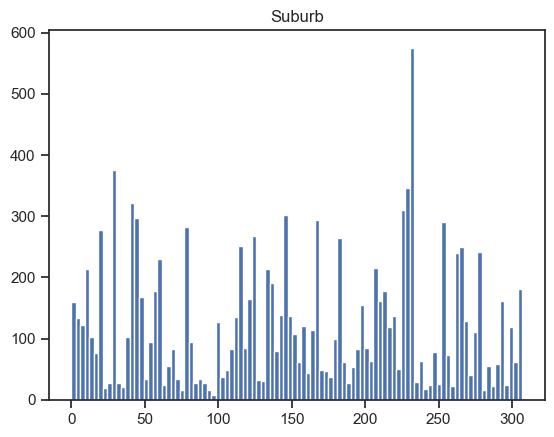

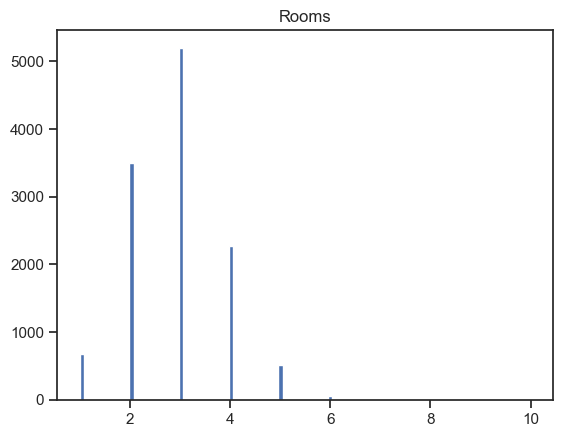

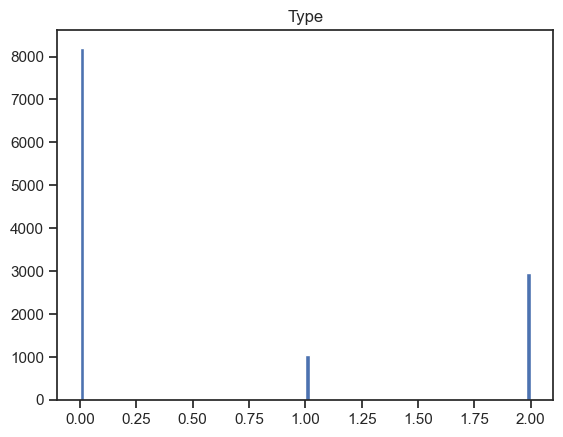

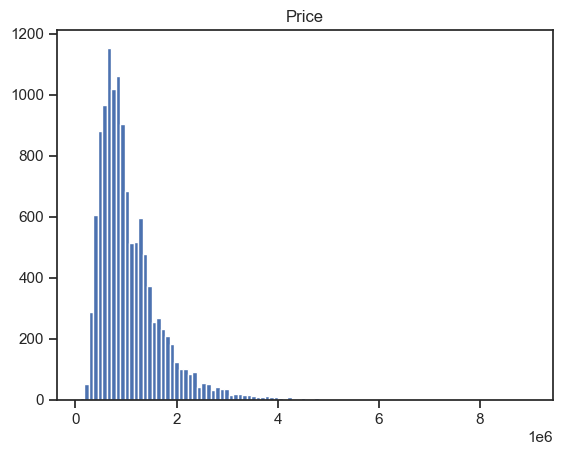

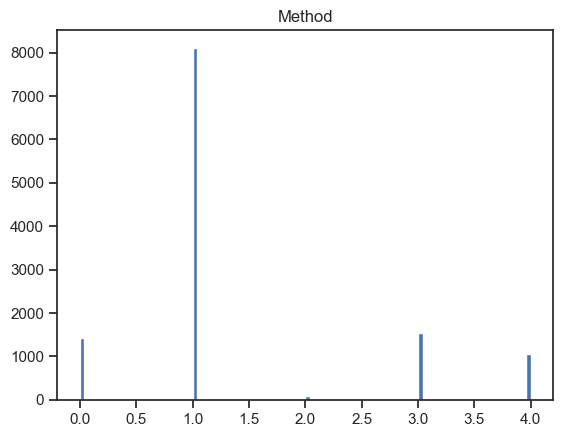

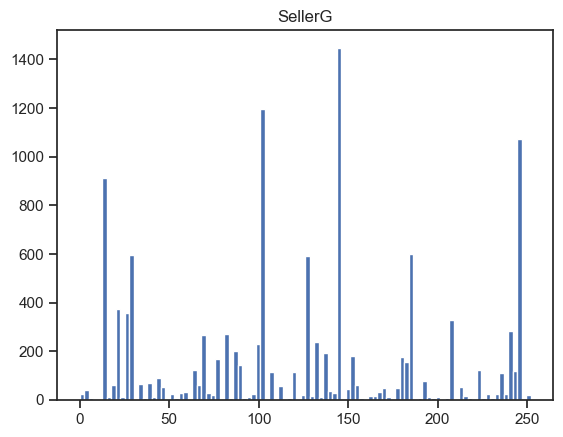

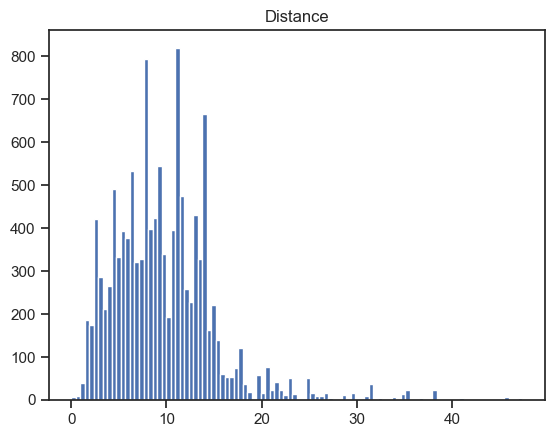

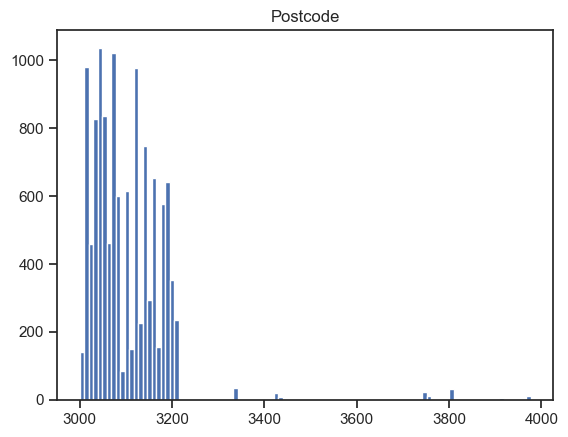

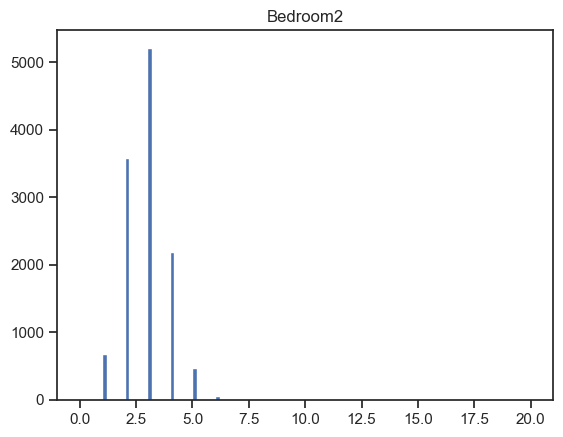

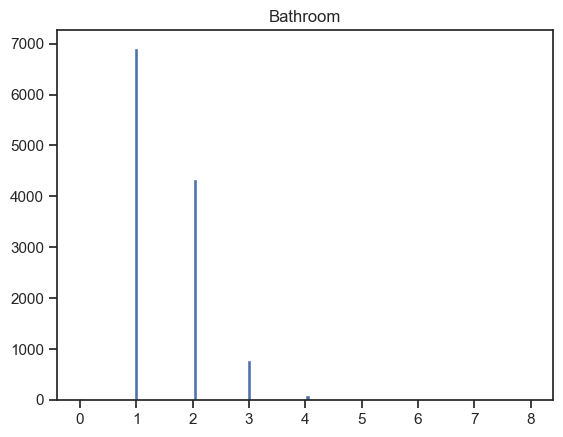

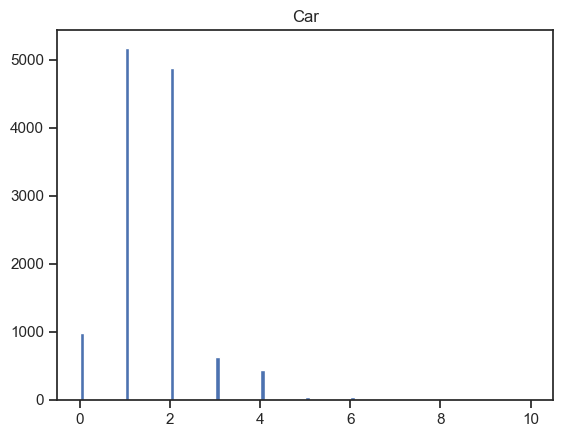

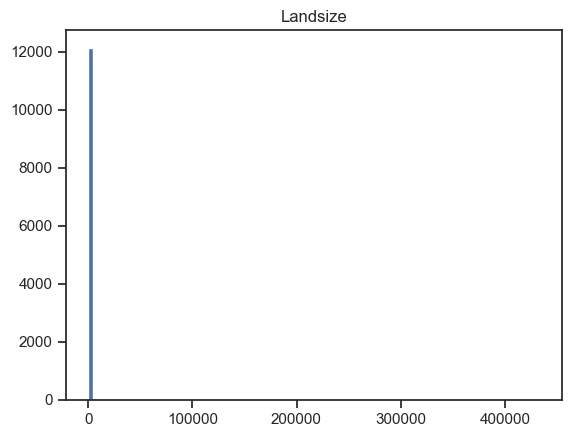

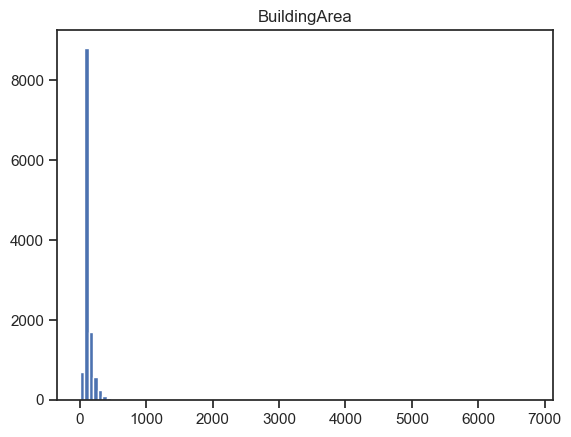

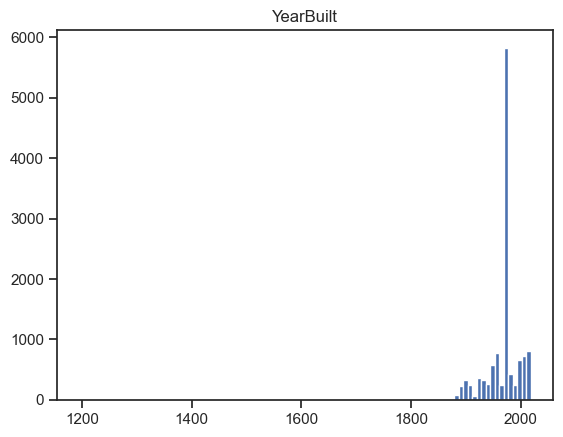

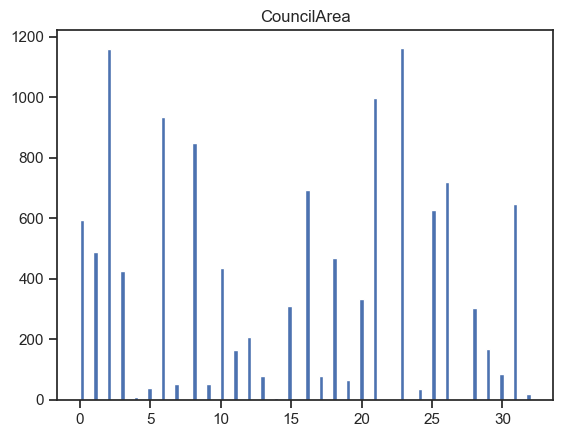

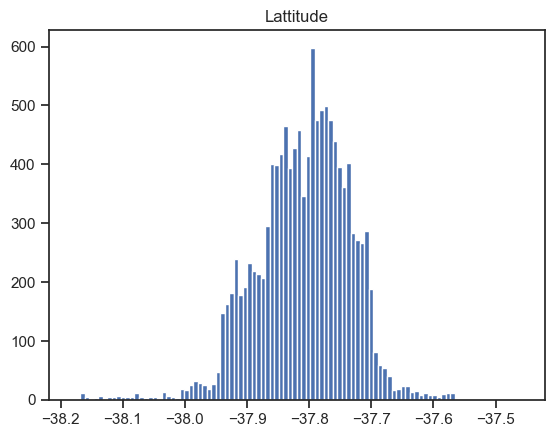

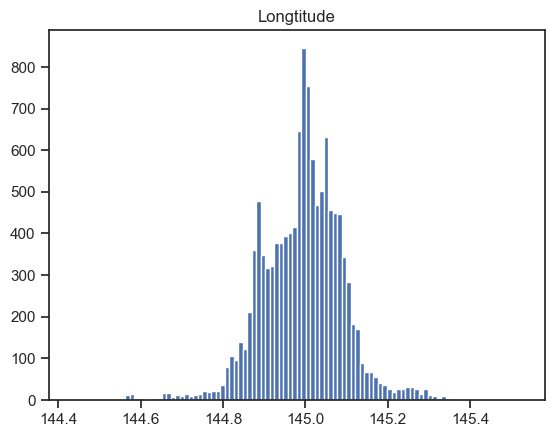

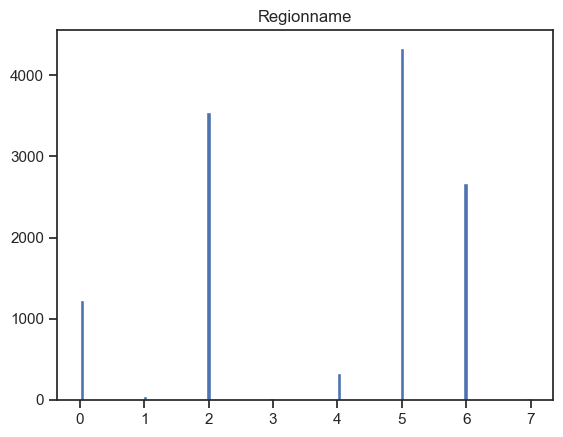

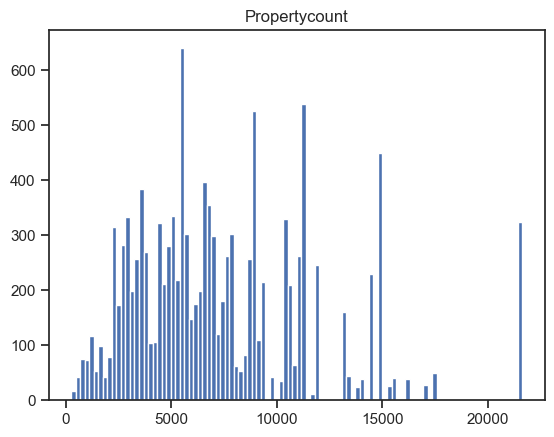

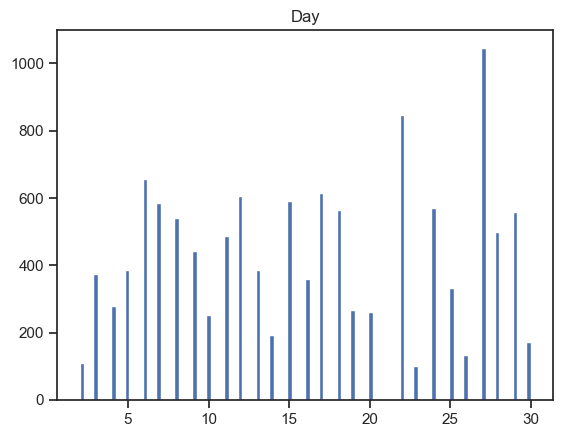

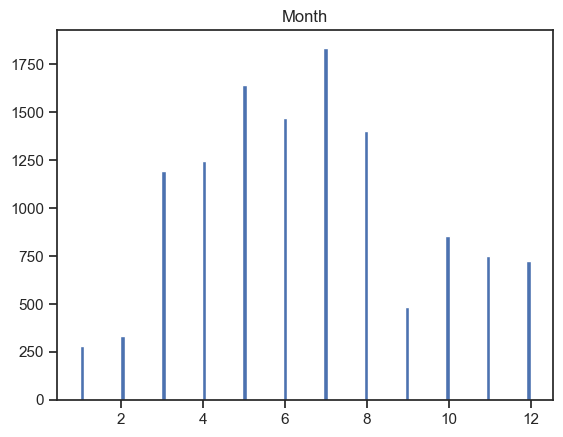

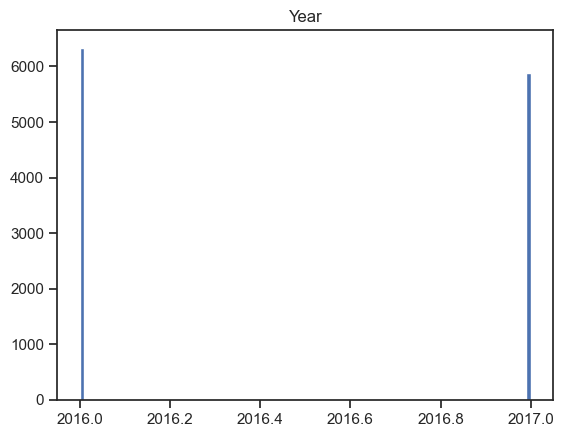

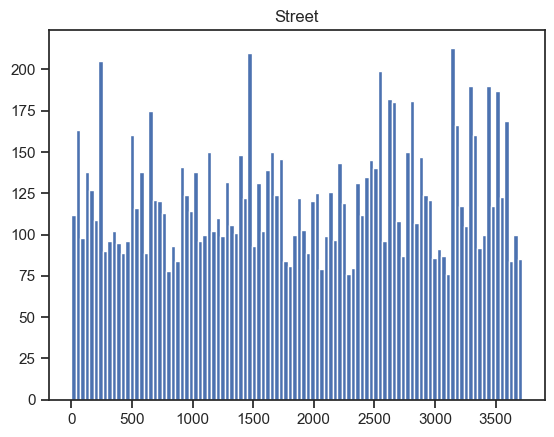

In [37]:
# Визуализация распределения всех признаков до стандартизации (масштабирования) по Z-преобразованию

for col in data.columns:
    plt.hist(data[col], 100)
    plt.title(col)
    plt.show()

На гистограммах можно заметить, что признаки имеют разный масштаб и распределения.

Некоторые признаки (например, Price, Distance, Propertycount) имеют сильную правостороннюю асимметрию (тяжелый хвост справа).

Это говорит о необходимости масштабирования и/или преобразования данных перед применением метода ближайших соседей (KNN), так как KNN чувствителен к масштабу признаков.


#### После

In [38]:
# Импорт трёх типов масштабирования из sklearn

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [39]:
#  Создаётся объект StandardScaler, который будет применять Z-преобразование к каждому признаку

# fit_transform() одновременно обучает масштабатор на данных (считает среднее и стандартное отклонение) и применяет трансформацию

# Все признаки теперь масштабированы так, чтобы:

# Среднее значение по столбцу стало 0;

# Стандартное отклонение — 1.

sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data)

In [40]:
sc2_data = pd.DataFrame(sc2_data, columns=data.columns)

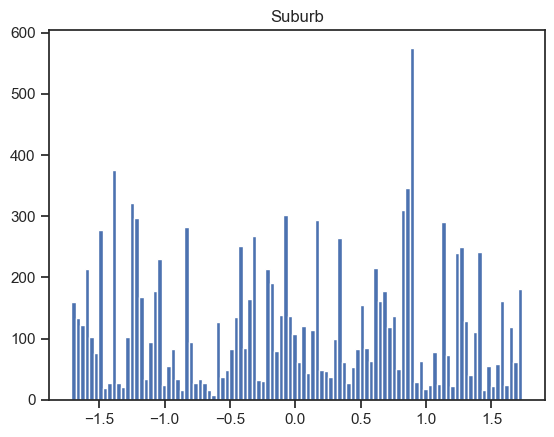

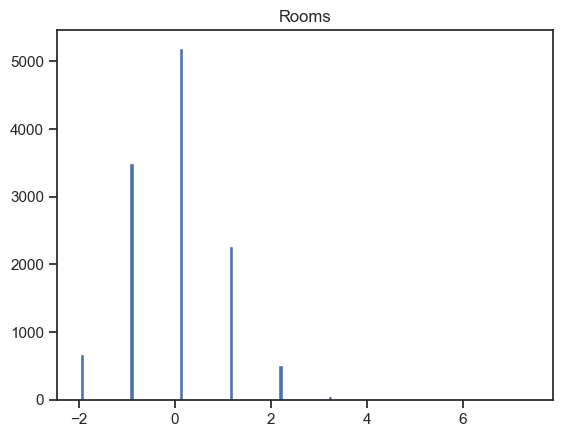

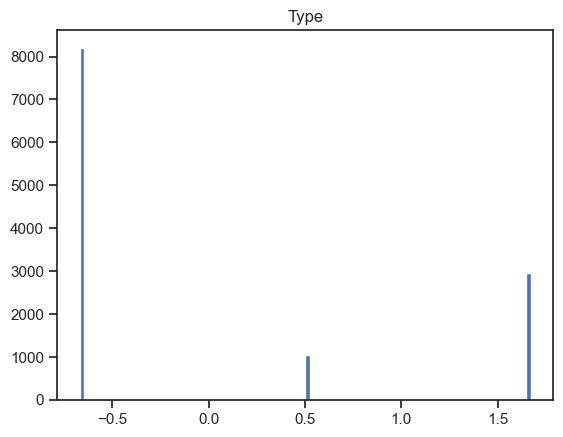

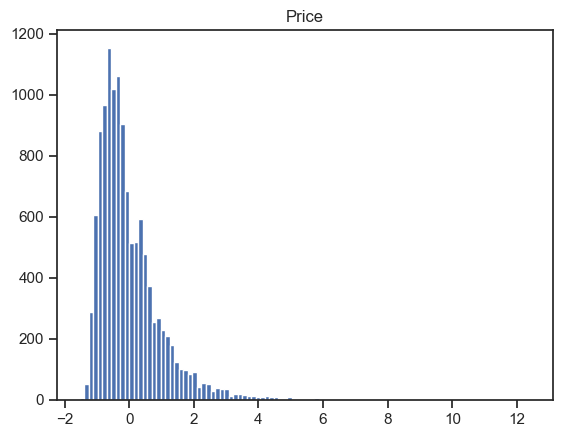

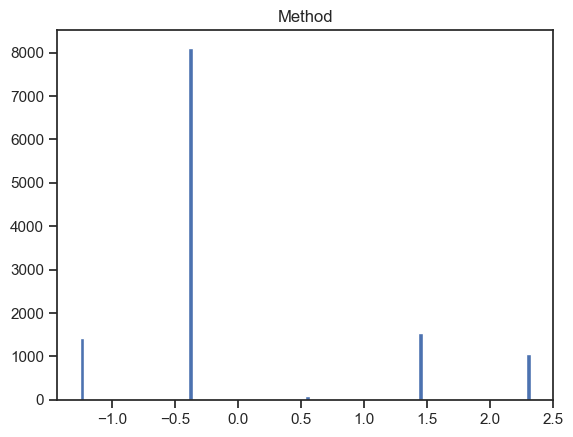

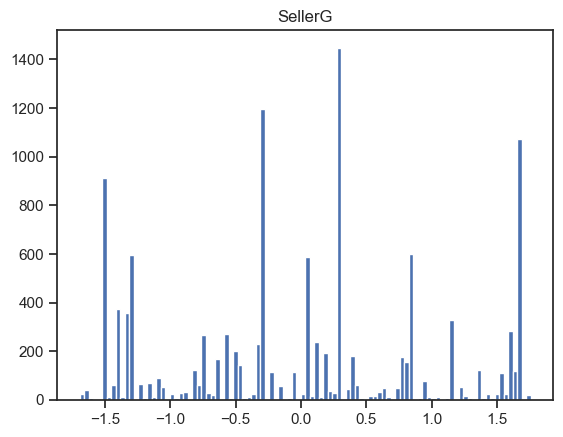

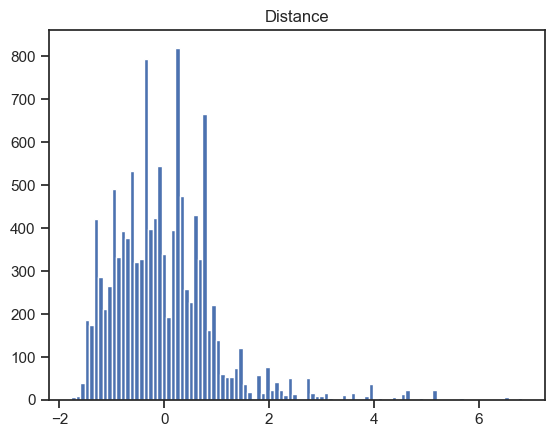

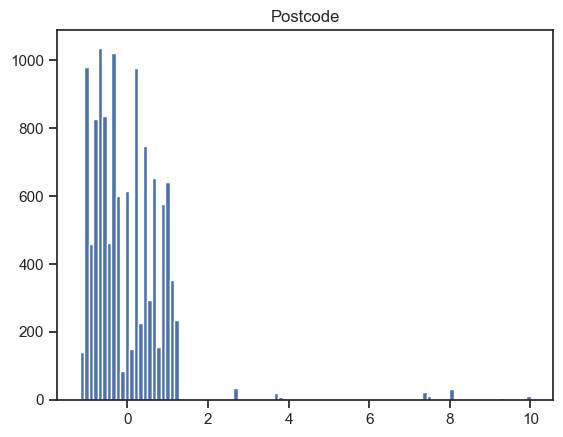

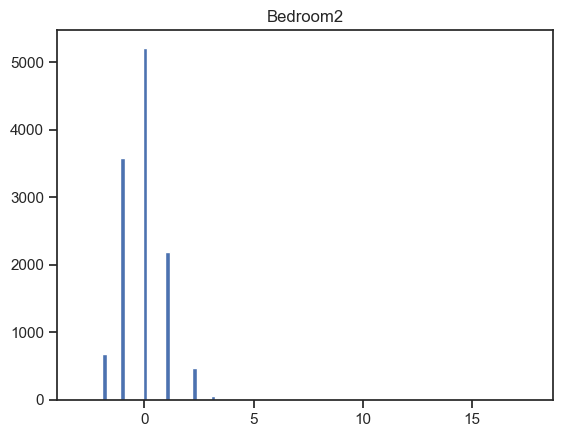

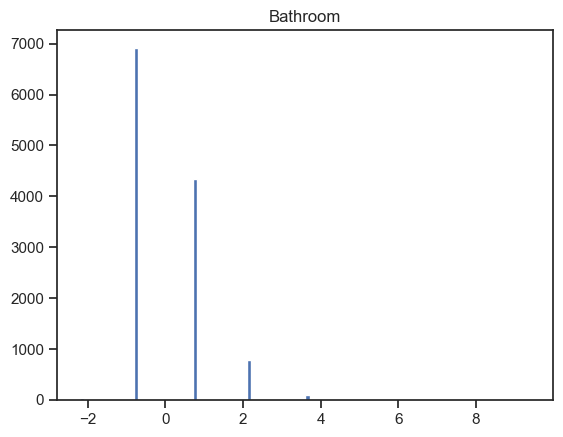

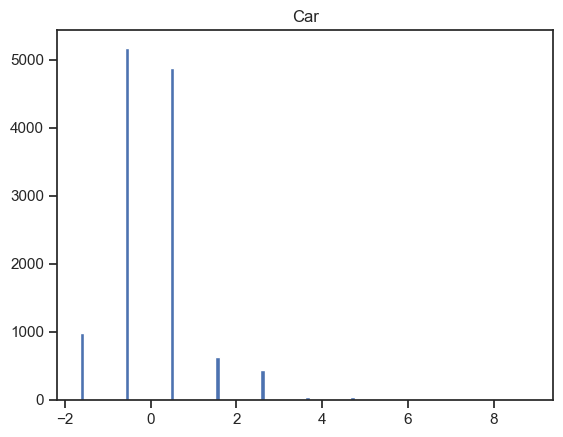

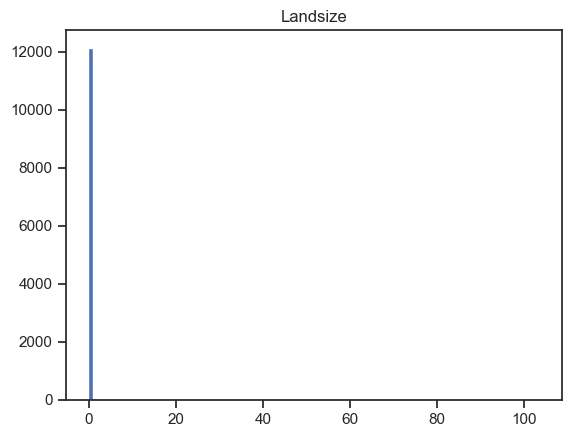

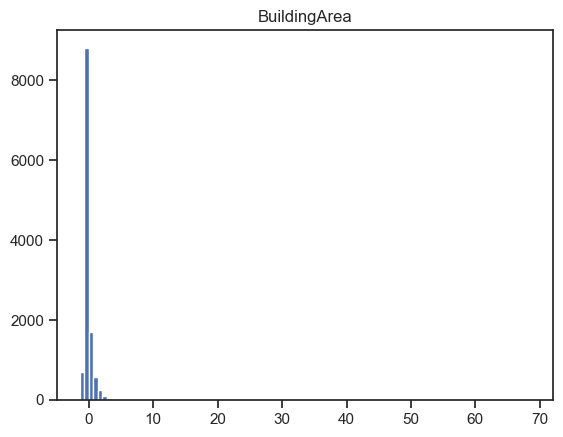

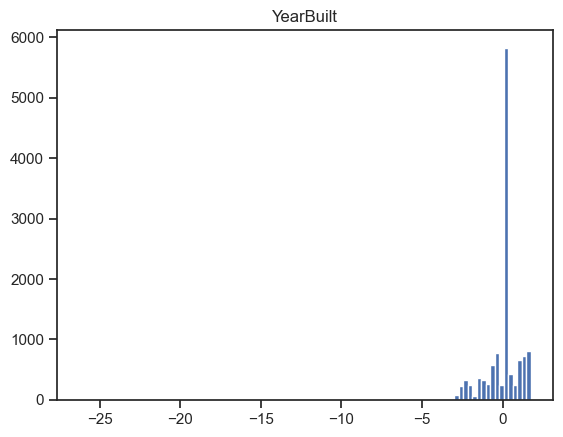

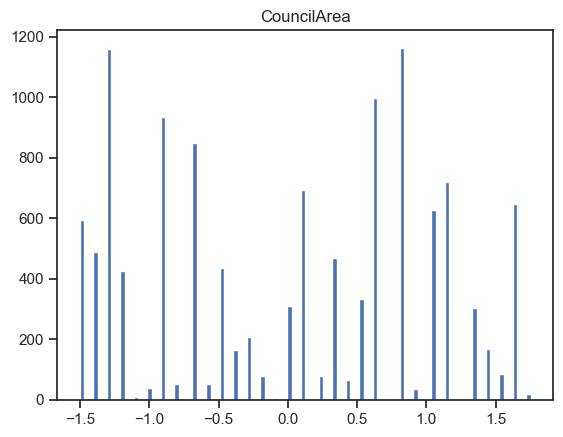

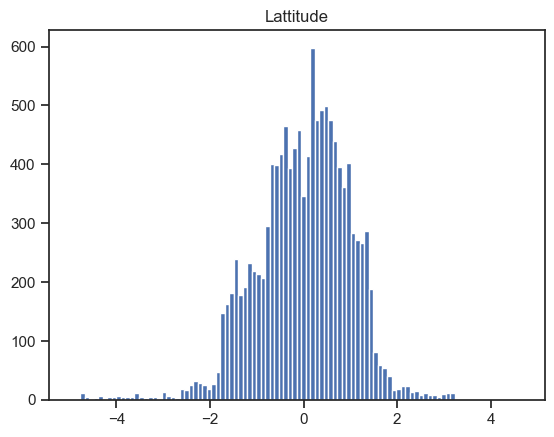

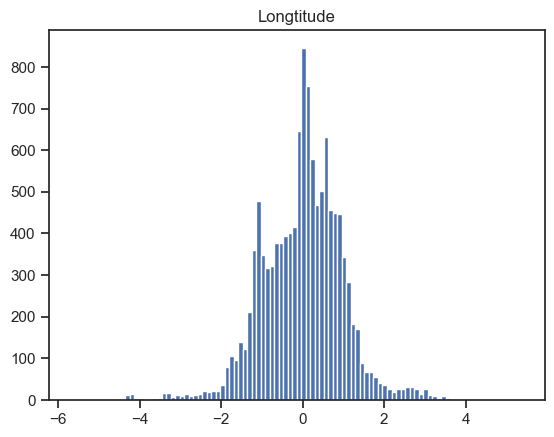

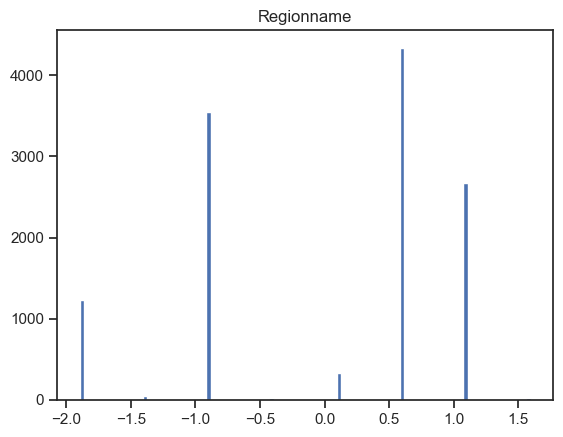

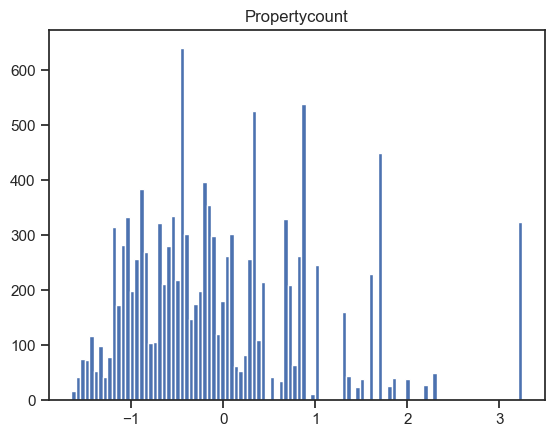

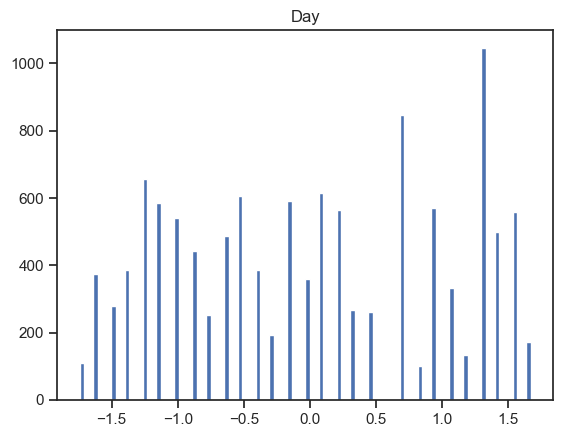

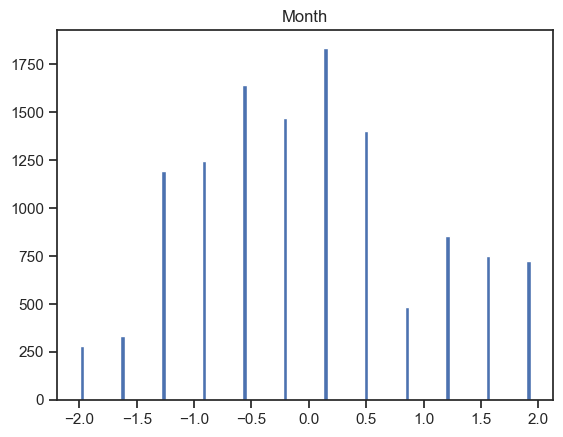

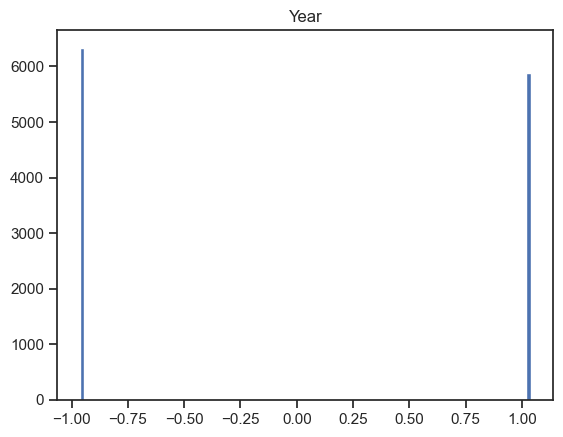

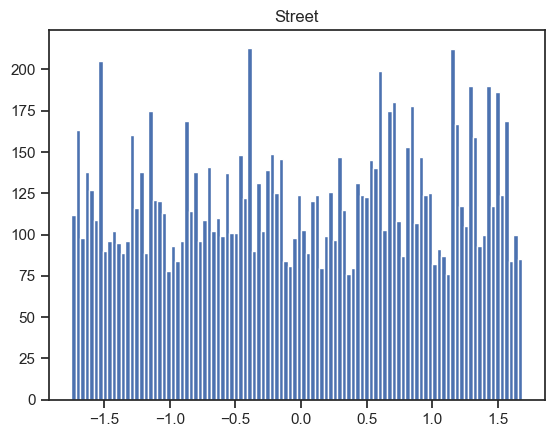

In [41]:
# Цикл визуализирует распределение каждого признака после стандартизации
# После

for col in data.columns:
    plt.hist(sc2_data[col], 100)
    plt.title(col)
    plt.show()

Данные успешно стандартизированы;

Гистограммы показывают, что признаки теперь имеют единый масштаб (центрированы вокруг 0, одинаковое стандартное отклонение);

Это делает данные подходящими для моделей, чувствительных к масштабу, таких как метод K-ближайших соседей (KNN).

## Обучение с фиксированным гиперапараметром

In [42]:
# Импорт всех нужных библиотек: разделение выборки, алгоритмы ближайших соседей, обучение и валидация, метрики регрессии

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_pinball_loss, d2_pinball_score, d2_absolute_error_score

In [43]:
# Копируем стандартизированные данные в переменную data

# Выделяем столбец Price как целевую переменную

data = sc2_data
target = sc2_data['Price']

# Удаляем Price из признаков, чтобы не использовать его как входной параметр

data.drop(columns=['Price'], inplace=True)

In [44]:
# Получаем размерность датафрейма (число строк и столбцов)

data.shape

(12211, 22)

In [45]:
# Статистическое описание признаков после стандартизации (среднее ≈ 0, стандартное отклонение ≈ 1)

data.describe()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Day,Month,Year,Street
count,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,...,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04,1.221100e+04
mean,-1.675836e-16,9.775709e-17,-5.586119e-17,-8.728311e-17,6.749894e-17,4.096487e-16,-1.955142e-16,1.582734e-16,-9.542954e-17,4.655099e-17,...,8.006771e-16,3.956834e-17,6.633168e-14,1.136496e-13,-2.793060e-17,-3.491325e-18,4.073212e-18,5.586119e-17,9.682607e-15,6.517139e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-1.713779e+00,-1.974554e+00,-6.679092e-01,-1.256809e+00,-1.692307e+00,-1.772836e+00,-1.180357e+00,-2.958890e+00,-2.202661e+00,-1.655768e+00,...,-2.623103e+01,-1.501642e+00,-4.964142e+00,-5.677929e+00,-1.896366e+00,-1.648721e+00,-1.740993e+00,-1.995070e+00,-9.629336e-01,-1.749416e+00
25%,-9.609414e-01,-9.321296e-01,-6.679092e-01,-3.618941e-01,-7.344135e-01,-7.016215e-01,-6.766680e-01,-8.957937e-01,-7.510612e-01,-6.038672e-01,...,-2.283664e-01,-8.915352e-01,-6.186451e-01,-6.397538e-01,-8.985197e-01,-7.032906e-01,-8.886206e-01,-5.665816e-01,-9.629336e-01,-8.613720e-01
50%,5.387686e-03,1.102950e-01,-6.679092e-01,-3.618941e-01,5.926979e-02,-1.024677e-01,-2.302162e-01,1.357545e-01,-7.510612e-01,-6.038672e-01,...,1.119827e-01,1.253089e-01,9.109507e-02,5.494373e-02,5.982504e-01,-2.027685e-01,-3.624805e-02,-2.094594e-01,-9.629336e-01,1.282498e-02
75%,8.593529e-01,1.102950e-01,5.023935e-01,-3.618941e-01,8.119005e-01,5.148423e-01,5.024227e-01,1.357545e-01,7.005387e-01,4.480333e-01,...,2.821572e-01,8.370998e-01,6.820801e-01,6.175395e-01,5.982504e-01,6.586696e-01,9.378921e-01,5.047849e-01,1.038493e+00,8.547127e-01
max,1.735791e+00,7.407267e+00,1.672696e+00,2.322850e+00,1.756110e+00,6.833191e+00,1.000383e+01,1.767207e+01,9.410138e+00,8.863237e+00,...,1.745658e+00,1.752259e+00,4.677957e+00,5.393332e+00,1.596097e+00,3.249163e+00,1.668497e+00,1.933274e+00,1.038493e+00,1.684600e+00


In [46]:
# Статистическое описание целевой переменной Price после стандартизации

target.describe()

count    1.221100e+04
mean    -1.629285e-16
std      1.000041e+00
min     -1.531994e+00
25%     -6.632256e-01
50%     -2.640617e-01
75%      4.012117e-01
max      1.242309e+01
Name: Price, dtype: float64

In [47]:
# Делим данные и целевую переменную на обучающую и тестовую части поровну, фиксируем случайность для воспроизводимости

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=1)

In [48]:
# Задаём число соседей для модели k-NN равным 70

K = 70

# Создаём регрессор ближайших соседей с 70 соседями
# Обучаем модель на обучающих данных
# Делаем прогнозы модели на обучающей и тестовой выборках

cl = KNeighborsRegressor(n_neighbors=K)
cl.fit(X_train, y_train)
target_train = cl.predict(X_train)
target_test = cl.predict(X_test)

In [49]:
# Функция для подсчёта набора метрик качества регрессии для заданных истинных и предсказанных значений

def scorer(y_true, y_pred):
    scores = {
        'r2': r2_score, 
        'mean_squared_error': mean_squared_error, 
        'mean_absolute_error': mean_absolute_error, 
        'r2_score': r2_score, 
        'explained_variance_score': explained_variance_score, 
        'mean_pinball_loss': mean_pinball_loss, 
        'd2_pinball_score': d2_pinball_score, 
        'd2_absolute_error_score': d2_absolute_error_score
    }

    for score, score_func in scores.items():
        scores[score] = score_func(y_true, y_pred)
    return scores

In [50]:
# Выводим метрики модели на обучающей и тестовой выборках для оценки её качества

print('Train: ', scorer(y_train, target_train))
print()
print('Test :', scorer(y_test, target_test))

Train:  {'r2': 0.6074478363288117, 'mean_squared_error': 0.4054128638342073, 'mean_absolute_error': 0.38465733025879834, 'r2_score': 0.6074478363288117, 'explained_variance_score': 0.6080485130705291, 'mean_pinball_loss': np.float64(0.19232866512939917), 'd2_pinball_score': np.float64(0.4454301531494722), 'd2_absolute_error_score': np.float64(0.4454301531494722)}

Test : {'r2': 0.6358064659388151, 'mean_squared_error': 0.3521518459937633, 'mean_absolute_error': 0.3775204179759272, 'r2_score': 0.6358064659388151, 'explained_variance_score': 0.6359862432962011, 'mean_pinball_loss': np.float64(0.1887602089879636), 'd2_pinball_score': np.float64(0.4426146306868046), 'd2_absolute_error_score': np.float64(0.4426146306868046)}


Модель k-NN с 70 соседями показывает неплохое качество — коэффициент детерминации R² около 0.61 на обучении и 0.64 на тесте, что говорит об адекватной обобщающей способности без явного переобучения; ошибки среднеквадратичная и средняя абсолютная на тесте чуть меньше, чем на обучении, что тоже подтверждает стабильность модели.

## Поиск лучших гиперпараметров

In [51]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Вспомогательные функции

In [52]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
    # Вычисляет и строит график валидационной кривой для параметра модели                                               
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    # Среднее и стандартное отклонение по тренировочным и тестовым скорингам
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    # plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw) # Кривая средних тренировочных баллов
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw) # Зона стандартного отклонения для обучения
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw) # Кривая средних кросс-валидационных баллов
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw) # Зона стандартного отклонения для валидации
    plt.legend(loc="best")
    return plt # Возвращает объект plt для дальнейших действий

In [53]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    # Строит кривую обучения — зависимости качества от размера обучающей выборки
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    # Среднее и std по тренировочным и тестовым скорингам
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r") # Зона std для тренировочных баллов (красная)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # Зона std для валидационных (зеленая)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score") # Кривая обучения (train)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score") # Кривая обучения (validation)

    plt.legend(loc="best")
    return plt # Возвращает объект plt

In [54]:
def get_best_param_for_score(results, score):
    # Из результатов поиска гиперпараметров берет параметры с лучшим ранком для указанной метрики
    return results['params'][np.where(results[f"rank_test_{score}"] == 1)[0][0]]

def get_best_param_for_scores(results, scores):
    # Возвращает словарь с лучшими параметрами для каждого из указанных скорингов
    return {score: get_best_param_for_score(results, score) for score in scores}

In [55]:
def show_plots_for_scores(n_range, results, scores):
    # Построение графиков изменения метрик для разных значений параметра
    for score in scores:
        plt.plot(n_range, results[f"mean_test_{score}"])
        plt.title(score)
        plt.show()

### Поиск

In [56]:
# Задаем метрики для оценки модели

scores = [
        'r2', 
        'neg_mean_squared_error', 
        'neg_mean_absolute_error',  
]

#### RandomizedSearch + KFolds 

In [57]:
# Диапазон значений для гиперпараметра n_neighbors

n_range_1 = np.array(range(3,100,10))
tuned_parameters_1 = [{'n_neighbors': n_range_1}]
tuned_parameters_1

[{'n_neighbors': array([ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93])}]

In [58]:
# Размер датасета (число объектов и признаков)

data.shape

(12211, 22)

In [59]:
# Настраиваем кросс-валидацию с 24 фолдами

kf = KFold(n_splits=24) # 500 samples for 1 fold 

In [61]:
# Запускаем RandomizedSearchCV с заданными параметрами, считаем время

#%%time
clf_rs = RandomizedSearchCV(KNeighborsRegressor(), tuned_parameters_1, cv=kf, scoring=scores , n_iter=n_range_1.size, refit=False)
s = clf_rs.fit(X_train, y_train)

In [62]:
# Выводим лучшие значения n_neighbors по каждой метрике

get_best_param_for_scores(clf_rs.cv_results_, scores)

{'r2': {'n_neighbors': np.int64(13)},
 'neg_mean_squared_error': {'n_neighbors': np.int64(13)},
 'neg_mean_absolute_error': {'n_neighbors': np.int64(13)}}

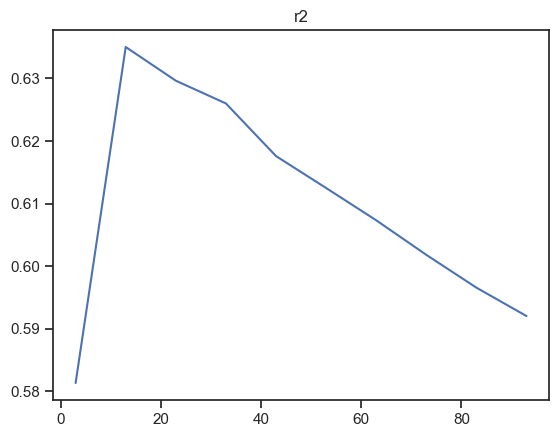

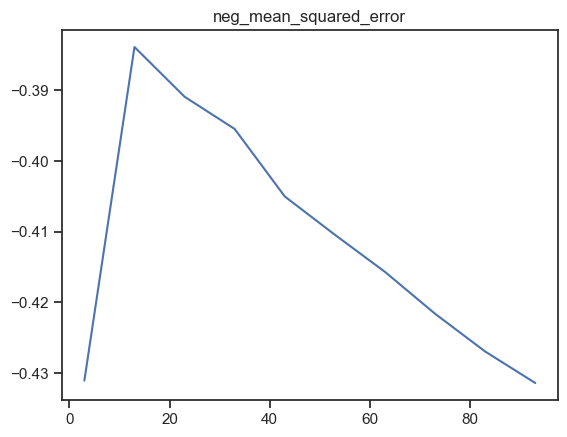

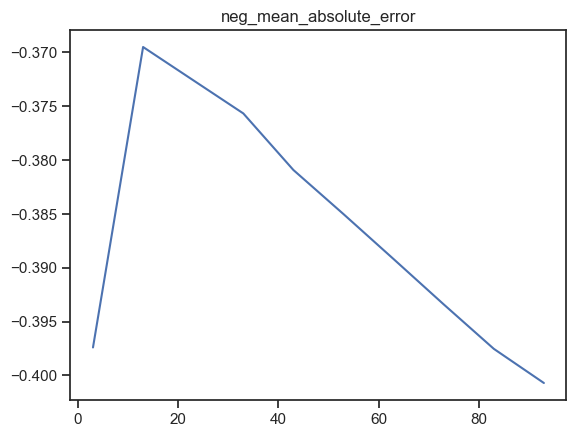

In [63]:
# Строим графики качества модели для разных n_neighbors

show_plots_for_scores(n_range_1, clf_rs.cv_results_, scores)

#### GridSearch + LeavePOut folds

In [64]:
# Сужаем диапазон поиска для n_neighbors

n_range_2 = np.array(range(10,20,1))
tuned_parameters_2 = [{'n_neighbors': n_range_2}]
tuned_parameters_2

[{'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}]

In [65]:
# Вычисляем треть от количества объектов

data.shape[0] / 3

4070.3333333333335

In [66]:
# Создаем повторную KFold-кроссвалидацию (12 фолдов, 2 повтора)
# Проверяем, что всего 24 разбиения

rkf = RepeatedKFold(n_splits=12, n_repeats=2)
len(list(rkf.split(X_train, y_train)))

24

In [68]:
# Запускаем GridSearchCV с более узким диапазоном и повторной кроссвалидацией

#%%time
clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters_2, cv=rkf, scoring=scores, refit=False)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=12, random_state=None),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}],
             refit=False,
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_mean_absolute_error'])

In [69]:
# Получаем лучшие параметры для каждой метрики

get_best_param_for_scores(clf_gs.cv_results_, scores)

{'r2': {'n_neighbors': np.int64(13)},
 'neg_mean_squared_error': {'n_neighbors': np.int64(10)},
 'neg_mean_absolute_error': {'n_neighbors': np.int64(12)}}

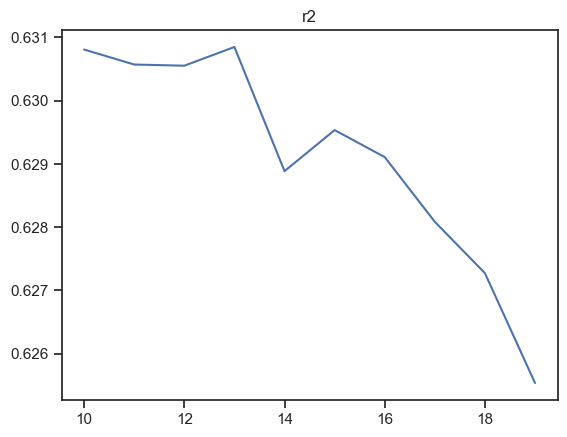

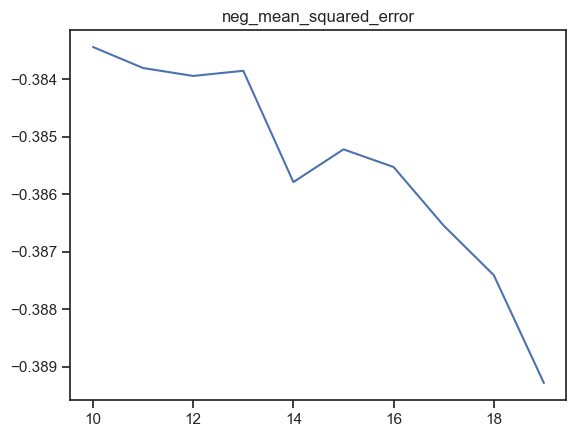

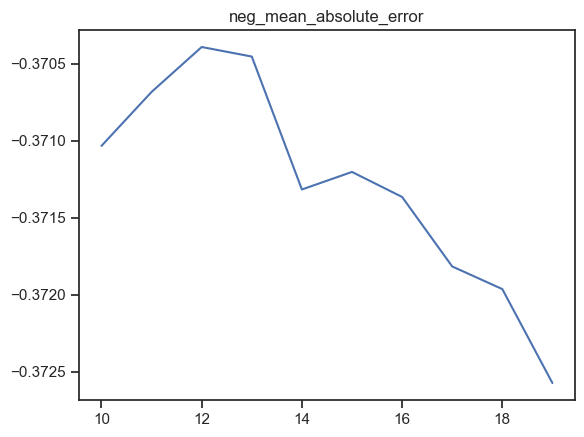

In [70]:
# Визуализируем результаты поиска по параметрам

show_plots_for_scores(n_range_2, clf_gs.cv_results_, scores)

##### Validation curve

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/pyplot.py'>

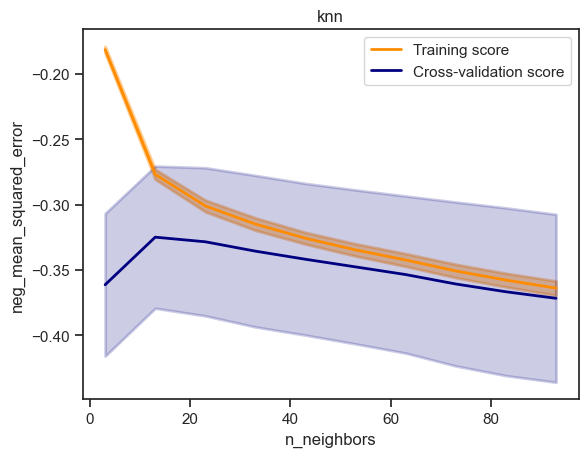

In [71]:
# Строим валидационную кривую для разных значений n_neighbors на тестовых данных с метрикой MSE

plot_validation_curve(KNeighborsRegressor(), 'knn', 
                      X_test, y_test, 
                      param_name='n_neighbors', param_range=n_range_1, 
                      cv=12, scoring='neg_mean_squared_error')

#### Learning Curve for best hyperparams

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/pyplot.py'>

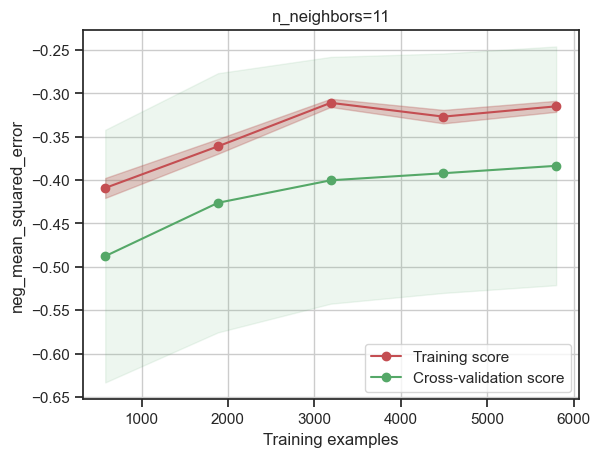

In [72]:
# Строим кривую обучения с K=11 по MSE, чтобы оценить зависимость ошибки от размера обучающей выборки

K = 11
plot_learning_curve(KNeighborsRegressor(n_neighbors=11), 'n_neighbors=11', 
                    X_train, y_train, cv=20, scoring='neg_mean_squared_error')

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/pyplot.py'>

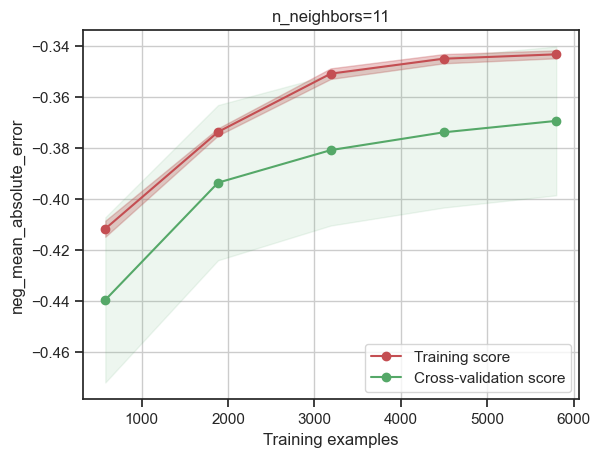

In [73]:
# Строим кривую обучения с K=14 по MAE, для анализа ошибки в зависимости от размера выборки

K = 14
plot_learning_curve(KNeighborsRegressor(n_neighbors=14), 'n_neighbors=11', 
                    X_train, y_train, cv=20, scoring='neg_mean_absolute_error')